# Versuch 243 Thermisches Rauschen - Messprotokoll
#### Felix Fleischle - 17.3.2022

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import scipy.integrate as integrate

#%matplotlib qt5

In [2]:
f, U_aus =np.loadtxt("C:/Users/fexfl/Documents/GitHub/PAP2/PAP2 Messdaten/PAP2.243 Frequenzgang.txt", skiprows=1, usecols=(0,1), unpack=True)

In [3]:
D=1e-3
U_ein=0.2
g=U_aus/(U_ein * D)

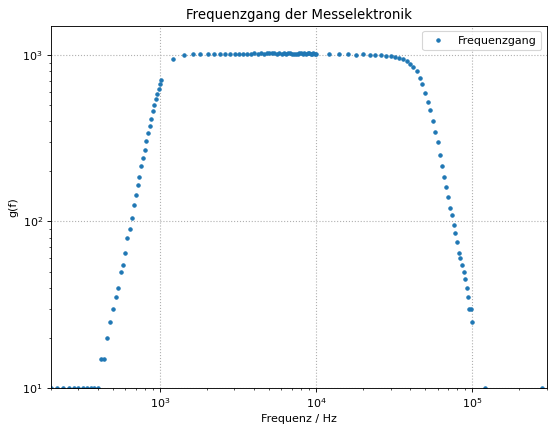

In [4]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(f,g, linestyle="None", marker=".", capsize = 2, elinewidth = 1, label="Frequenzgang")
plt.axis([2E2, 3e5, 10, 1.5E3])
plt.xlabel("Frequenz / Hz")
plt.ylabel("g(f)")
plt.xscale("log")
plt.yscale("log")
plt.title("Frequenzgang der Messelektronik")
plt.legend()
plt.grid(linestyle=":", linewidth=1)

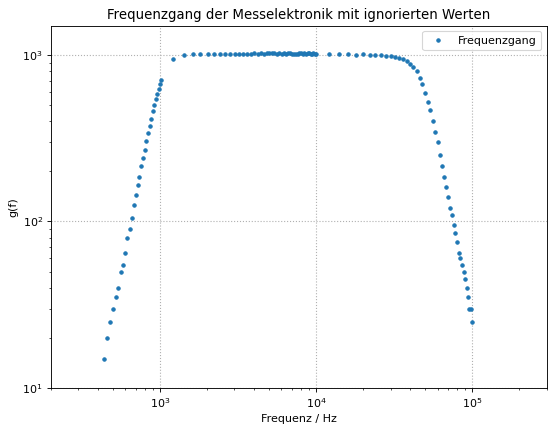

In [5]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(f[17:-44],g[17:-44], linestyle="None", marker=".", capsize = 2, elinewidth = 1, label="Frequenzgang")
plt.axis([2E2, 3e5, 10, 1.5E3])
plt.xlabel("Frequenz / Hz")
plt.ylabel("g(f)")
plt.xscale("log")
plt.yscale("log")
plt.title("Frequenzgang der Messelektronik mit ignorierten Werten")
plt.legend()
plt.grid(linestyle=":", linewidth=1)

In [6]:
def fit_func(f,V,W1,W2,n1,n2):
    return V/(np.sqrt(1+1/(f/W1)**(2*n1))*np.sqrt(1+(f/W2)**(2*n2)))

p0 = [1000 , 1000 , 50000 , 5 , 5]
popt, pcov = curve_fit(fit_func, f[17:-44], g[17:-44] ,p0)

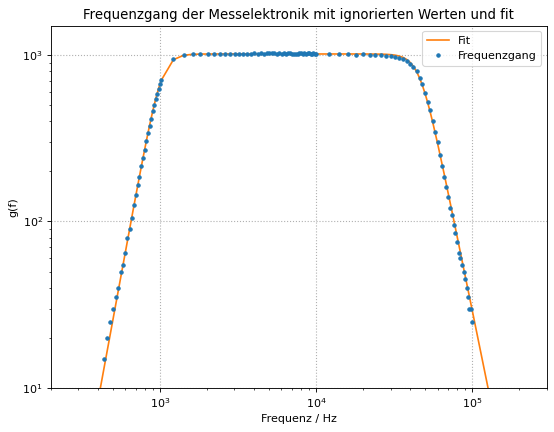

In [7]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(f[17:-44],g[17:-44], linestyle="None", marker=".", capsize = 2, elinewidth = 1, label="Frequenzgang")
plt.loglog(f, fit_func(f, *popt), label="Fit")
plt.axis([2E2, 3e5, 10, 1.5E3])
plt.xlabel("Frequenz / Hz")
plt.ylabel("g(f)")
plt.xscale("log")
plt.yscale("log")
plt.title("Frequenzgang der Messelektronik mit ignorierten Werten und fit")
plt.legend()
plt.grid(linestyle=":", linewidth=1)

In [8]:
def fit_func_square(f,V,W1,W2,n1,n2):
    return fit_func(f,V,W1,W2,n1,n2)**2

B=integrate.quad(fit_func_square, f[17], f[-44], args=tuple(popt))
#print("Das Integral betraegt: {value:.4e}".format(value=B[0]))
print("Wert des Integrals:",B[0])
B_err = 0.02 * B[0]
print("Fehler von B:", B_err)

Wert des Integrals: 47391070165.28931
Fehler von B: 947821403.3057861


In [11]:
R=np.array([5e3 , 10e3 , 15e3 , 20e3 , 25e3 , 30e3])
R_err = 0.005 * R
U_aus=np.array([2.3856, 3.1014, 3.6879, 4.1979, 4.6483, 5.0699]) /1000
n_array=np.array([105, 104, 103, 102, 103, 104])
fehler_U_aus=np.array([0.0088, 0.0139, 0.0156, 0.015, 0.0177, 0.0199])/np.sqrt(n_array) /1000
fehler_U_aus_sys = 0.003 * U_aus
U_aus_err = np.sqrt(fehler_U_aus_sys**2 + fehler_U_aus**2)
U_V=1.3769 /1000
U_V_err = np.sqrt( (0.00549/np.sqrt(103) /1000)**2 + (0.003 * U_V)**2 )
D=U_aus**2-U_V**2
fehler_D=np.sqrt((2*U_V*U_V_err)**2 + (2*U_aus*U_aus_err)**2)

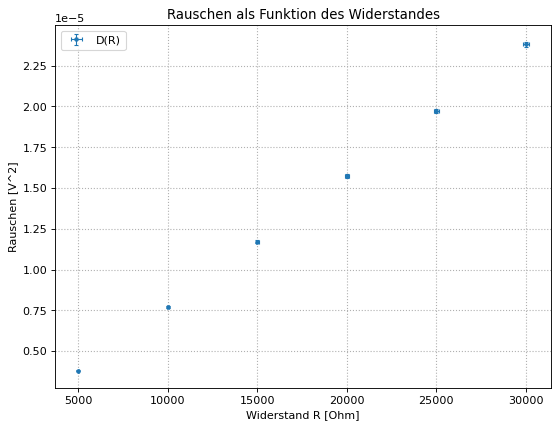

In [12]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(R,D, yerr = fehler_D, xerr = R_err, linestyle='None', marker = ".", label="D(R)", capsize = 2, elinewidth=1)
plt.xlabel('Widerstand R [Ohm]')
plt.ylabel('Rauschen [V^2]')
plt.title('Rauschen als Funktion des Widerstandes')
#plt.yscale('log')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

In [13]:
def linear(x,c):
    return c*x

popt_lin, pcov_lin = curve_fit(linear, R, D, sigma=fehler_D)

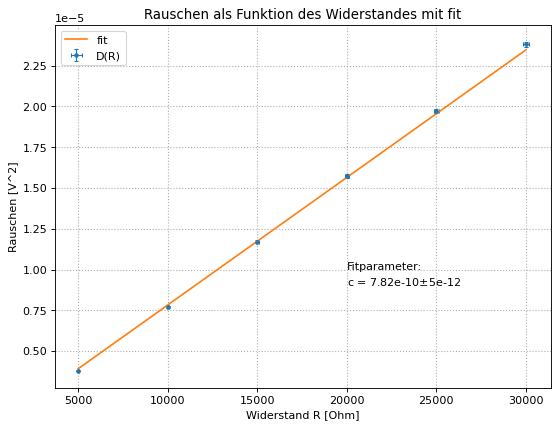

In [14]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(R,D, yerr = fehler_D, xerr = R_err, linestyle='None', marker = ".", label="D(R)", capsize = 2, elinewidth=1)
plt.plot(R,linear(R,*popt_lin), label="fit")
plt.xlabel('Widerstand R [Ohm]')
plt.ylabel('Rauschen [V^2]')
plt.title('Rauschen als Funktion des Widerstandes mit fit')
#plt.yscale('log')
plt.legend()
plt.text(20000, 0.00001, 'Fitparameter:')
plt.text(20000, 0.000009, 'c = ' + str(np.round(popt_lin[0],12)) + '$\pm$' + str(np.round(np.sqrt(pcov_lin[0,0]),12)))
plt.grid(linestyle=":", linewidth=1)

In [17]:
chisquare=np.sum(((linear(R,*popt_lin)-D)**2/fehler_D**2))
dof=5 #degrees of freedom, Freiheitsgrad
chisquare_red=chisquare/dof
print(chisquare)
print(chisquare_red)

19.91242711271242
3.982485422542484


In [18]:
from scipy.stats import chi2
prob=round(1-chi2.cdf(chisquare,dof),2)*100
print("Wahrscheinlichkeit="+str(prob)+"%")

Wahrscheinlichkeit=0.0%


In [19]:
T = 22.8 + 273.15 #K
T_err = 0.1
k = popt_lin[0]/(4*T*B[0])
k_err_sys = np.sqrt((T_err / T)**2 + (B_err / B[0])**2) *k
k_err_std = np.sqrt(pcov_lin[0,0]) / popt_lin[0] *k
print("Boltzmann:", k, "+-", k_err_sys, "+-", k_err_std)

k_err_ges = np.sqrt(k_err_sys**2 + k_err_std**2)

Boltzmann: 1.3943548031787863e-23 +- 2.7891075720460406e-25 +- 8.202222206511647e-26


In [20]:
k_lit = 1.380649e-23
sigma_k = (k - k_lit)/k_err_ges
print("Abweichung:", sigma_k)

Abweichung: 0.47144136701844097
